# Домашнее задание 2

Это домашнее задание по материалам второго семинаров. Дедлайн по отправке - 23:55 17 февраля. 

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается мне на почту: __beznosikov.an@phystech.edu__.

Решение каждой задачи необходимо поместить после её условия.

Файл должен называться: Фамилия_Имя_Optimization_HW_2

При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок. 

## Задача 1

Рассмотрим проекцию на единичном $\ell_1$-шар:
\begin{equation*}
    \text{proj}_{C}(x) = \arg\min_{y \in C} \|x-y\|^2,
\end{equation*}
где $C = \{x ~|~ \|x\|_1 \leq 1 \}$.

__(а)__ Найдите выражение для такой проекции в явном виде.

[Презенташка](https://angms.science/doc/CVX/Proj_l1.pdf)

$$\text{proj}_C(x) = \arg\min_{y \in C} \|x-y\|_2^2 = \arg\min_{\|y\|_1 \leq 1} \frac{1}{2} \|x-y\|_2^2.$$

Воспользуемся теоремой ККТ:

$$\mathcal{L}(x, \lambda) = \frac{1}{2} \|x - y \|_2^2 + \lambda~(\|y\|_1 - 1) = \sum\limits_{i = 1}^d \left( \frac{1}{2} (y_i - x_i)^2 + \lambda |y_i| \right) - \lambda$$

$$\mathcal{L_i}(x, \lambda) = \frac{1}{2} (y_i - x_i)^2 + \lambda |y_i|$$

1. $0 \in \partial_{y_i} L_i $

$$0 \in y_i - x_i + \lambda
    \begin{cases}
        -1, & \text{если $y_i < 0$;} \\
        [-1; 1], & \text{если $y_i = 0$;}\\
        1, & \text{если $y_i > 0$.}
    \end{cases}
$$

$$y_i = \text{sign}(x_i)(|x_i| - \lambda)_+. $$

2. $\lambda (\| y \|_1 - 1) = 0$

3. $\| y \|_1 - 1 \leq 0$

4. $\lambda \geq 0$

При $\lambda = 0$ имеем $y = x$.

Если $\lambda > 0$, то

$$
    \begin{cases}
        y_i = \text{sign}(x_i)(|x_i| - \lambda)_+; \\
        \sum\limits_{i = 1}^d (|x_i| - \lambda)_+ = 1.\\
    \end{cases}
$$

Таким образом:

$$
    \begin{cases}
        \text{proj}_{C}(x) = x, & \text{если $\| x \|_1 \leq 1$;} \\
        \text{proj}_{C}(x)_i = \text{sign}(x_i)(|x_i| - \lambda)_+ \quad \forall i \in \overline{1, d}, & \text{если $\| x \|_1 > 1$,}
    \end{cases}
$$

где $\lambda$ находится из уравнения $\sum\limits_{i = 1}^d (|x_i| - \lambda)_+ = 1$.

Для нахождения $\lambda$ введем функцию:

$$ g(\lambda) = \sum\limits_{i = 1}^d (|x_i| - \lambda)_+ - 1. $$

Для начала отсортируем массив из модулей $x_i$, назовем его $|x'|$.

a) Если $g(0) \leq 0 \Rightarrow \| x \|_1 \leq 1$ , то берем $y = x$.

б) Если $g(0) > 0$, то найдётся $m$ такое, что $g(x_{m}') \geq 0$ и $g(x_{m + 1}') < 0$, следовательно:

$$\sum\limits_{i = m + 1}^d (|x_i'| - \lambda) = 1 \Rightarrow \lambda = \frac{1}{d - m} \left( \sum\limits_{i = m + 1}^d |x_i'| - 1 \right)$$

__(б)__ Сравните:
\begin{equation*}
    \text{proj}_C (x) \quad \text{и} \quad \text{prox}_{\lambda \mathbb{I}_C} (x),
\end{equation*}
где $\lambda > 0$, а $\mathbb{I}_C$ - индикаторная функция множества $C$:
$$
\mathbb{I}_C = 
\begin{cases}
0 ,& x \in C \\
+\infty, &x \notin C.
\end{cases}
$$
Являются ли данные операторы эквивалентными для любых $\lambda > 0$ и выпуклых $C$?

$$\text{proj}_C (x) = \arg\min_{y \in C} \{ \|y - x \|_2^2 \}$$

$$\text{prox}_{\lambda \mathbb{I}_C} (x) = \arg\min_{y \in \mathbb{R}^d} \left\{ \frac{1}{2} \|y - x \|_2^2 + \mathbb{I}_C (x)\right\}$$

$$\text{prox}_{\lambda \mathbb{I}_C} (x) = \arg\min_{y \in C} \left\{ \frac{1}{2} \|y - x \|_2^2 \right\} = \arg\min_{y \in C} \{ \|y - x \|_2^2 \} = \text{proj}_C (x)$$

Таким образом, они являются эквивалентными.

## Задача 2

Рассмотрим задачу минимизации эмпирического риска:
\begin{equation}
\min_{w \in \mathbb{R}^d} \frac{1}{n} \sum\limits_{i=1}^n l (g(w, x_i), y_i),
\end{equation}
где $l$ - функция потерь, $g$ - модель, $w$ - параметры модели, $\{x_i, y_i\}_{i=1}^n$ - выборка данных из векторов признаков $x_i$ и меток $y_i$.

Далее будем рассматривать линейной модель $g(w, x) = w^T x$ и квадратичную функцию потерь $l(z, y) = (z-y)^2$.

__(а)__ Запишите задачу минимизации эмпирического риска с линейной моделью  и квадратичной функцией потерь в векторно-матричном виде, используя $X$ - матрицу из векторов $\{x_i\}$ и вектор $y$ - из $\{y_i\}$.

ОТВЕТ

Задача запишется следующим образом:
\begin{equation*}
    \min \frac{1}{n} \sum_{i=1}^n (\omega^T x_i - y_i)^2,
\end{equation*}
что эквивалентно следующему:
\begin{equation*}
    \min_{\omega \in \mathbb{R}^d} \|X^T\omega - y\|^2,
\end{equation*}

\begin{equation*}
    f(\omega) = \dfrac{2}{n} \left(\frac{1}{2} \omega^TX^TX\omega - y^TX\omega \rightarrow \text{min}\right).
\end{equation*}

То есть мы получили квадратичную задачу:
\begin{equation*}
    A = \dfrac{2}{n} X^TX, \; b = \dfrac{2}{n} y^TX
\end{equation*}

__(б)__ К заданию приложен датасет _mushrooms_. С помощью следующего кода сформируйте матрицу $X$ и вектор $y$:

In [214]:
import numpy as np
from sklearn.datasets import load_svmlight_file

dataset = "mushrooms.txt"
data = load_svmlight_file(dataset)
X, y = data[0].toarray(), data[1]
y -= 1.0
n, d = X.shape

In [215]:
z = np.count_nonzero(y)
print('Класс 0: ', z)
print('Класс 1: ', n - z)

# элементов 0 и 1 класса примерно поровну

Класс 0:  4208
Класс 1:  3916


Разделите (лучше случайно) данные (а значит $X$ и $y$) на две части: обучающую и тестовую (примерно в отношении $4$ к $1$). Опишите, как это было сделано.

In [216]:
from sklearn.model_selection import train_test_split

train_size = 0.8
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, test_size=test_size, shuffle=True)
print(f"train data len: {len(X_train)}")
print(f"test data len: {len(X_test)}")

train data len: 6499
test data len: 1625


__(в)__ Для обучающей части $X_{train}$, $y_{train}$ оцените константу $L$ задачи обучения/оптимизации. Будет ли задача выпуклой? Сильно выпуклой?

In [217]:
import scipy 

A_train = 2 / X_train.shape[0] * X_train @ X_train.T
lambdas, _ = scipy.sparse.linalg.eigsh(A_train, 100, which='LA')

m = min(lambdas)
L = max(lambdas)
print(f'mu = {m}, L = {L}')

# задача квадратичная, поэтому можем оценить mu и L по собственным числам матрицы A

mu = 3.244391696978714e-16, L = 20.714778442226272


$L > 0, \mu \approx 0 \rightarrow$ задача является выпуклой.

__(г)__ Используя материалы прошлого ДЗ (по желанию), решите задачу оптимизации/обучите модель машинного обучения с помощью градиентного спуска. Изобразите график сходимости. Какой критерий сходимости будет использовать? Сделайте вывод. Опишите проблемы, с которыми пришлось столкнуться.

In [218]:
import math
from numba import jit
import warnings
warnings.filterwarnings("ignore")

A = 2 / X_train.shape[0] * X_train.T @ X_train
b = 2 / X_train.shape[0] * y_train.T @ X_train

@jit
def f(w):
    return 0.5 * w.T @ A @ w - b.T @ w

@jit
def grad_f(w):
    return A @ w - b

# наискорейший спуск
@jit
def alpha(w):
    g = grad_f(w)
    return (g.T @ g) / (g.T @ A @ g)


def grad_descent(iters=100):

    w = np.random.random_integers(-5, 5, d)
    f_vals = [f(w)]
    w_gd = [w]

    for i in range(iters):
        w = w - alpha(w) * grad_f(w)
        w_gd.append(w)
        f_vals.append(f(w))
        
    print(f"Optimal: f(w*) = {f(w)}")
    return w_gd, f_vals

In [235]:
iters = 5000
w_gd, f_gd = grad_descent(iters)

Optimal: f(w*) = -0.50388811028383


Из-за отсутствия выраженной сильной выпуклости даже наискорейший спуск сходится проблематично. 

Посмотрим на график сходимости по критерию $|f(x_{k+1}) - f(x_k)|$.

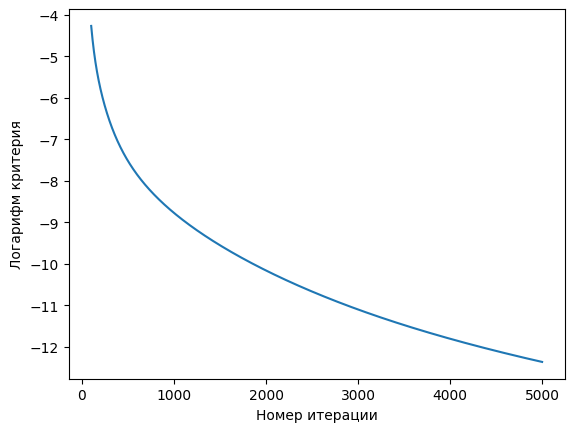

In [236]:
import matplotlib.pyplot as plt

err = [abs(f_gd[k+1] - f_gd[k]) for k in range(100, iters-1)]
err.append(err[-1])

plt.plot(range(100, iters), np.log(err))
plt.xlabel("Номер итерации")
plt.ylabel("Логарифм критерия")
plt.show()

# на первых шагах всегда происходит какая-то дичь, поэтому первые 100 итераций я выкинул

Проблема: даже при 5000 итераций начальная точка существенно сказывается на решении (при разных запусках погрешность решения может заметно меняться).

Причина: плохая обусловленность матрицы.

__(д)__ Как использовать итоговую модель для предсказания? Ответив на вопрос, сделайте предсказания на тестовой выборке. Сравните с реальными метками. Количество правильно угаданных меток есть точность/accuracy вашей модели. Запустите еще раз процесс обучения из пункта г), постройте как меняется точность модели от номера итерации градиентного спуска (измеряйте не каждую итерацию, а, например, каждую 100 или 1000). 

In [238]:
from sklearn.metrics import accuracy_score

def acc_score(w):
    train = accuracy_score([round(x) for x in (X_train @ w)], y_train)
    test = accuracy_score([round(x) for x in (X_test @ w)], y_test)
    return train, test

# веса - w*
w = w_gd[-1]

train1, test1 = acc_score(w)
print(f"Train accuracy: {train1}")
print(f"Test accuracy: {test1} \n")

Train accuracy: 0.9946145560855516
Test accuracy: 0.9956923076923077 



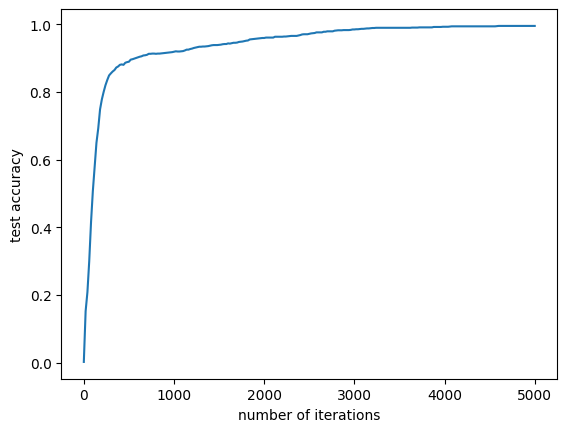

In [239]:
acc = list()
n = list()
for i in range(0, len(w_gd), 20):
    w = w_gd[i]
    n.append(i)
    acc.append(accuracy_score([round(x) for x in (X_test @ w)], y_test))

plt.plot(n, acc)
plt.xlabel("number of iterations")
plt.ylabel("test accuracy")
plt.show()

__(e)__ Теперь рассмотрим эту же задачу обучения на $\ell_1$-шаре с радиусом $\lambda$. Повторите пункты г) и д) только теперь градиентный спуск должен быть модифицирован с помощью оператора проекции. Пробуйте различные $\lambda > 0$ и найдите лучшее (опишите почему именно такое лучшее). Удалось ли улучшить процесс обучения/точность модели на тестовой выборке? 

In [240]:
def proj(x, r=50):
    
    d = len(x)
    y = []
    m = 0
    
    def g(i):
        g = 0
        for j in range(d):
            g += max(x[j] - x[i], 0)
        return g - r
            
    if np.linalg.norm(x, ord = 1) <= r:
        return x
    else:
        x = np.sort(np.abs(x))
        x_new = [0] + x
        for i in range(d):
            if g(i) >= 0 and g(i + 1) < 0:
                m = i
                break
                
        lambd = 1 / (d - m) * (np.linalg.norm(x[m + 1:], ord = 1) - r)
        
        for i in range(d):
            y.append(np.sign(x[i]) * max(np.abs(x[i]) - lambd, 0))
        y = np.array(y)
        return y

In [241]:
def grad_descent_proj(iters=1000, r=50):

    w = np.random.random_integers(-1, 1, d)
    f_vals = [f(w)]
    w_vals = [w]

    gamma = 1 / L
    for i in range(iters):
        w = proj(w - gamma * grad_f(w), r=r)
        w_vals.append(w)
        f_vals.append(f(w))
    
    return w_vals, f_vals

Построим графики сходимости для разных $r$ по критерию $||\nabla f(x)||^2$.

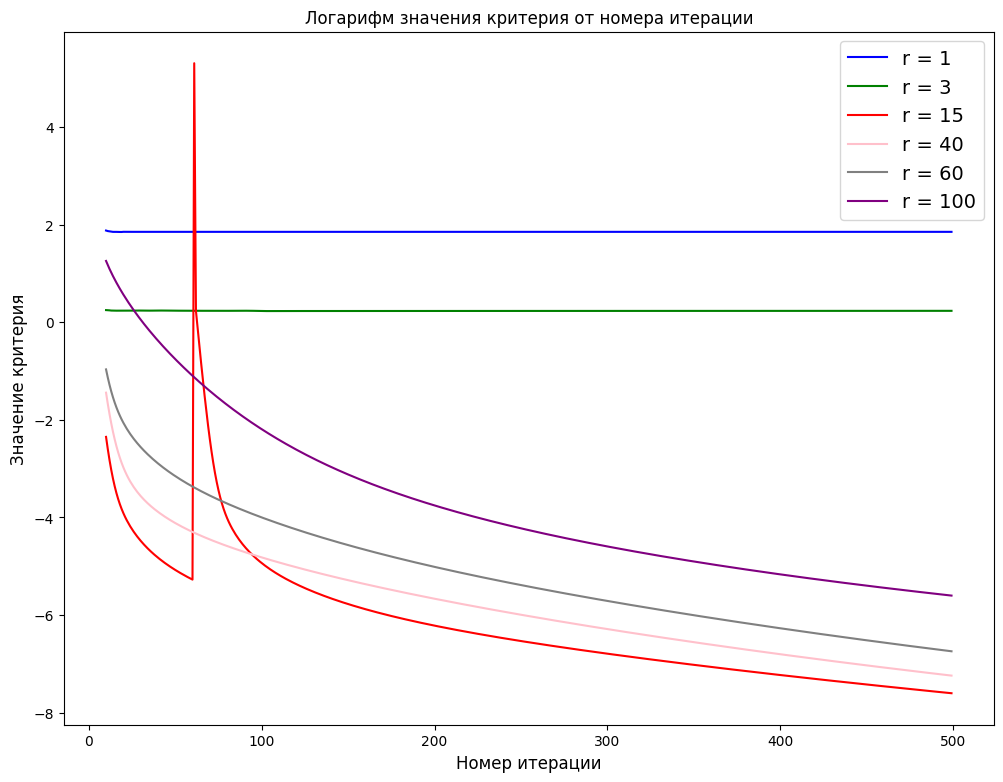

In [242]:
plt.figure(figsize = (12, 9))

rn = [1, 3, 15, 40, 60, 100]
colors = ["blue", "green", "red", "pink", "gray", "purple"]
iters = 500

for r, color in zip(rn, colors):
    w_proj, f_proj = grad_descent_proj(iters=iters, r=r)
    n = range(10, iters)
    err = [np.linalg.norm(grad_f(w_proj[i])) ** 2 for i in range(10, iters)]
    plt.plot(n, np.log(err), color = color, label = "r = " + str(r))

plt.title("Логарифм значения критерия от номера итерации", fontsize = 12)
plt.xlabel("Номер итерации", fontsize = 12)
plt.ylabel("Значение критерия", fontsize = 12)

plt.legend(fontsize = 14)
plt.show()

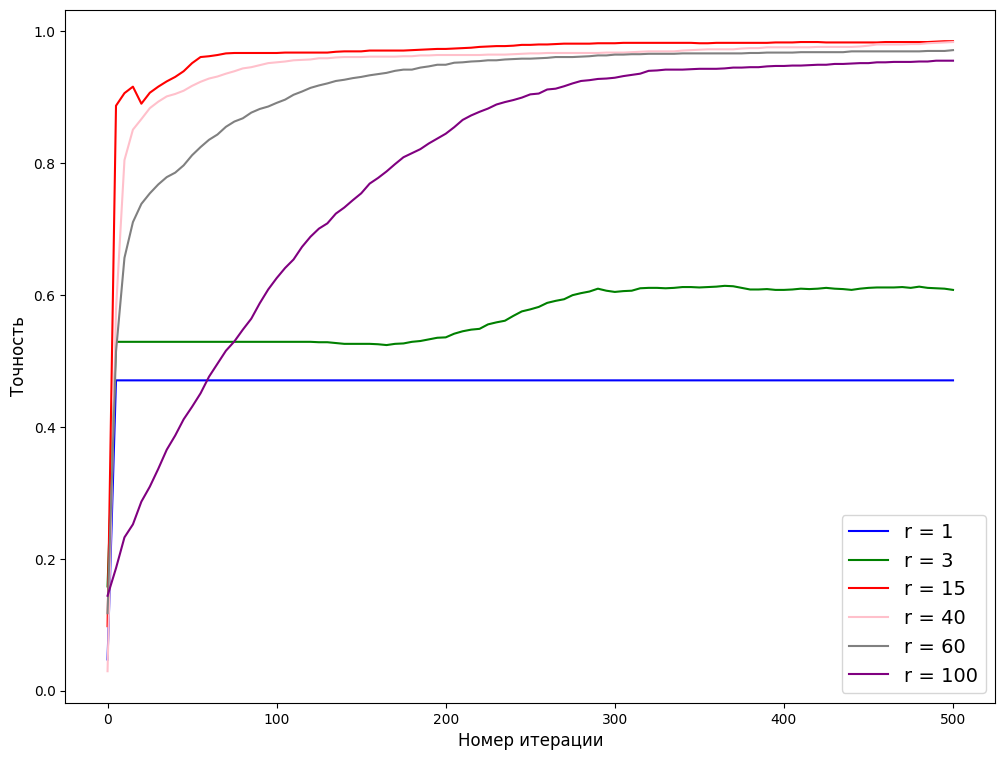

In [208]:
plt.figure(figsize = (12, 9))

rn = [1, 3, 15, 40, 60, 100]
colors = ["blue", "green", "red", "pink", "gray", "purple"]
iters = 500

for r, color in zip(rn, colors):

    w_proj, f_proj = grad_descent_proj(iters=iters, r=r)
    n, acc = [], []

    for i in range(0, len(w_proj), 5):
        w = w_proj[i]
        n.append(i)
        acc.append(accuracy_score([round(x) for x in (X_test @ w)], y_test))

    plt.plot(n, acc, color = color, label = "r = " + str(r))

plt.xlabel("Номер итерации", fontsize = 12)
plt.ylabel("Точность", fontsize = 12)

plt.legend(fontsize = 14)
plt.show()

В качестве оптимального значения выберем $r = 40$: при таком $r$ наблюдается лучшая скорость обучения и точность предсказания при условии монотонной сходимости. Сравним теперь метод с проекциями при этом $r$ c обычным градиентным спуском.

Optimal: f(w*) = -0.49120781749750997


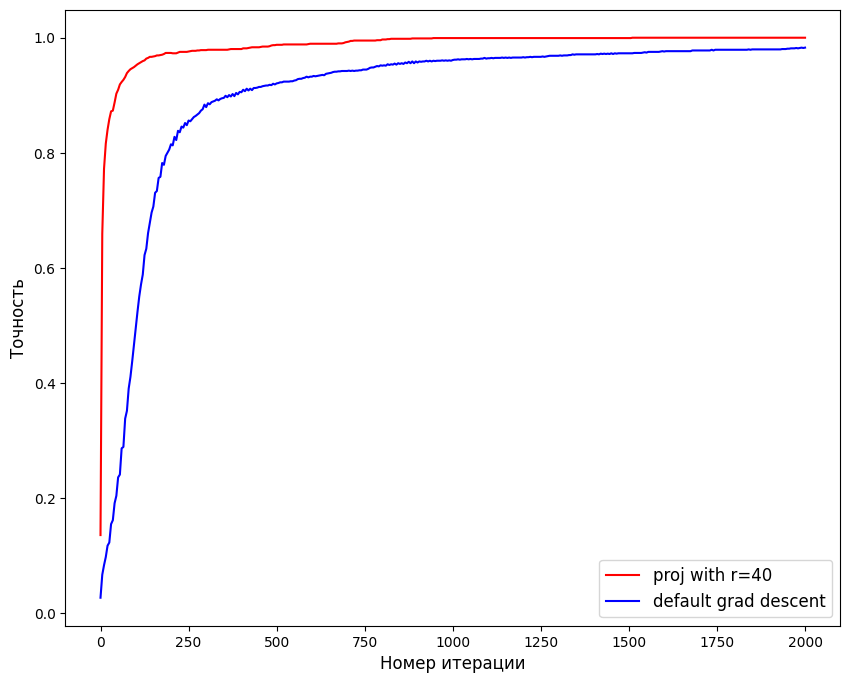

In [243]:
iters = 2000
w_gd, f_gd = grad_descent(iters=iters)
w_proj, f_proj = grad_descent_proj(iters=iters, r=40)

plt.figure(figsize = (10, 8))

# proj
n1, acc1 = [], []
for i in range(0, len(w_proj), 5):
    w = w_proj[i]
    n1.append(i)
    acc1.append(accuracy_score([round(x) for x in (X_test @ w)], y_test))
plt.plot(n1, acc1, color = 'red', label = "proj with r=40")

# gd
n2, acc2 = [], []
for i in range(0, len(w_proj), 5):
    w = w_gd[i]
    n2.append(i)
    acc2.append(accuracy_score([round(x) for x in (X_test @ w)], y_test))
plt.plot(n2, acc2, color = 'blue', label = "default grad descent")

plt.xlabel("Номер итерации", fontsize = 12)
plt.ylabel("Точность", fontsize = 12)

plt.legend(fontsize = 12)
plt.show()

Видим, что метод проекций значительно повысил скорость обучения (по итерациям). При этом и точность предсказания этого метода превосходит обычный градиентный спуск даже при большом числе итераций. 

Но есть нюанс: метод проекций работает значительно дольше классического градиентного спуска.

__Бонусные пункт__

__(ж)__ Снова рассмотрим задачу обучения без ограничений, но добавим к ней регуляризатор 1) $\lambda \| x \|_1$ c $\lambda  > 0$, 2) $\lambda \| x \|_2$ c $\lambda  > 0$. Сможем ли для новой задачи с регуляризатором использовать честный градиентный спуск без модификаций? Почему? Предложите свои идеи, как модифицировать градиентный спуск для новой задачи. Проведите для него эксперименты из пунктов г) и д).  Пробуйте различные $\lambda > 0$ и найдите лучшее (опишите почему именно такое лучшее). Сравните результаты с пунктом e).

In [ ]:
#ответ

__(з)__ Воспользуемся для нашей задачи методом [PCA](https://ru.wikipedia.org/wiki/Метод_главных_компонент). Прочитайте про него подробнее и опишите основную идею.

In [ ]:
#ответ

Следующий код запускает PCA для нашего датасета. Убедитесь, что понимаете происходящие.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca.fit(X_train)  #эта строчка будет работать только если есть матрица X_train
print (pca.explained_variance_ratio_.cumsum())

[0.16992991 0.30154325 0.39514945 0.45741144 0.49742599 0.53511437
 0.56758122 0.5961941  0.62312061 0.64511831]


Какое значение n_components разумно поставить? Для новой матрицы X_train повторите пункт ж). Измерьте время работы процесса обучения. Постройте график точности решения на тестовой выборке от времени работы для честного X_train и полученного с помощью PCA.